**Analyzing Subgroups**

- heatmaps to explore correlations between different identity mentions and toxicity scores
- The mean toxicity score for each subgroup and use bar charts to see the difference

**Comparative Analysis**

- **Compare Subgroups**: Use side-by-side comparisons to see how different subgroups stack up against each other in terms of toxicity.

<span style="color: yellow;"><b>Imports</b></span>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import nltk
from nltk.corpus import stopwords


<span style="color: yellow;"><b>Using merge_data.csv</b></span>

In [ ]:
eda = pd.read_csv('data/merged_data.csv')

In [ ]:
print(f'Rows for EDA    : {len(eda)}')
print(f'Columns for EDA : {len(eda.columns)}')

In [ ]:
eda.columns

In [ ]:
eda['identity_annotator_count'].unique()

In [ ]:
len(eda['identity_annotator_count'].unique())

<span style="color: Orange;"><b>Heatmaps</b></span>

In [ ]:
# subgroup
gender_cols = ['male', 'female', 'bisexual', 'transgender', 'heterosexual', 'other_gender', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
race_cols = ['asian', 'black', 'white', 'latino', 'other_race_or_ethnicity']
religion_cols = ['hindu', 'buddhist', 'christian', 'muslim', 'jewish', 'atheist', 'other_religion']


In [ ]:
# Heatmaps:  to explore correlations between different identity mentions and toxicity scores

gender_data = eda[['toxicity'] + gender_cols]
race_data = eda[['toxicity'] + race_cols]
religion_data = eda[['toxicity'] + religion_cols]


gender_corr = gender_data.corr()
race_corr = race_data.corr()
religion_corr = religion_data.corr()

# subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Color palettes for different plots
colors = "coolwarm"
all_subgroup_palette = "viridis"

# gender heatmap
sns.heatmap(gender_corr, annot=True, cmap=colors, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Gender vs. Toxicity')

# race/ethnicity heatmap
sns.heatmap(race_corr, annot=True, cmap=colors, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('Race/Ethnicity vs. Toxicity')

# religion heatmap
sns.heatmap(religion_corr, annot=True, cmap=colors, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Religion vs. Toxicity')

# Combine all subgroups and plot heatmap
all_subgroups = gender_cols + race_cols + religion_cols
all_data = eda[['toxicity'] + all_subgroups]
all_corr = all_data.corr()
sns.heatmap(all_corr, annot=True, cmap=all_subgroup_palette, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('All Subgroups vs. Toxicity')

plt.tight_layout()
plt.show()


Mean for all

In [ ]:
#Means:

#  gender columns
mean_gender = eda[gender_cols].mean()

# race columns
mean_race = eda[race_cols].mean()

# religion columns
mean_religion = eda[religion_cols].mean()

print("Mean of Gender Columns:")
print(mean_gender)

print("\nMean of Race Columns:")
print(mean_race)

print("\nMean of Religion Columns:")
print(mean_religion)


Plot :

In [ ]:
import matplotlib.pyplot as plt

mean_gender = {
    'male': 0.108047,
    'female': 0.126652,
    'bisexual': 0.001893,
    'transgender': 0.006712,
    'heterosexual': 0.003248,
    'other_gender': 0.000882,
    'homosexual_gay_or_lesbian': 0.025378,
    'other_sexual_orientation': 0.001492
}

mean_race = {
    'asian': 0.011886,
    'black': 0.034276,
    'white': 0.056535,
    'latino': 0.006151,
    'other_race_or_ethnicity': 0.008158
}

mean_religion = {
    'hindu': 0.001443,
    'buddhist': 0.001393,
    'christian': 0.095184,
    'muslim': 0.049078,
    'jewish': 0.017910,
    'atheist': 0.003468,
    'other_religion': 0.006718
}

plt.figure(figsize=(12, 6))

plt.bar(mean_gender.keys(), mean_gender.values(), label='Gender', color='#9CC8ED')
plt.bar(mean_race.keys(), mean_race.values(), label='Race', color='#F4E8AB')
plt.bar(mean_religion.keys(), mean_religion.values(), label='Religion', color='#AAE2C3')

plt.xlabel('Subgroups')
plt.ylabel('Mean Values')
plt.title('Mean Toxicity Scores for Different Subgroups')
plt.xticks(rotation=90)
plt.legend()

# Adding data labels to each bar
for data in [mean_gender, mean_race, mean_religion]:
    for subgroup, value in data.items():
        plt.text(subgroup, value + 0.001, round(value, 3), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### >= 0.5 and toxic = 1

In [ ]:
#mean columns

toxic_data = eda[eda['toxic'] == 1] # toxic data have values where toxic = 1

mean_toxic_gender = toxic_data[gender_cols].apply(lambda x: x[x >= 0.5].mean())
mean_toxic_race = toxic_data[race_cols].apply(lambda x: x[x >= 0.5].mean())
mean_toxic_religion = toxic_data[religion_cols].apply(lambda x: x[x >= 0.5].mean())




In [ ]:
# all values where toxic = 1 and cols >= 0.5

t_gend = (toxic_data[gender_cols].values >= 0.5).any(axis=1)
toxic_gender = toxic_data.loc[t_gend, gender_cols + ['comment_text']]

t_race = (toxic_data[race_cols].values >= 0.5).any(axis=1)
toxic_race = toxic_data.loc[t_race, race_cols + ['comment_text']]

t_rel = (toxic_data[religion_cols].values >= 0.5).any(axis=1)
toxic_religion = toxic_data.loc[t_rel, religion_cols + ['comment_text']]

In [ ]:
print("Mean of Gender Columns (>= 0.5 where toxic is 1):")
print(mean_toxic_gender)

print("\nMean of Race Columns (>= 0.5 where toxic is 1):")
print(mean_toxic_race)

print("\nMean of Religion Columns (>= 0.5 where toxic is 1):")
print(mean_toxic_religion)

In [ ]:
mean_gender = {
    'male': 0.832137,
    'female': 0.890529,
    'bisexual': 0.683539,
    'transgender': 0.821347,
    'heterosexual': 0.747159,
    'other_gender': 0.533333,
    'homosexual_gay_or_lesbian': 0.878025,
    'other_sexual_orientation': 0.533333
}

mean_race = {
    'asian': 0.758636,
    'black': 0.898275,
    'white': 0.896285,
    'latino': 0.729187,
    'other_race_or_ethnicity': 0.567602
}

mean_religion = {
    'hindu': 0.762626,
    'buddhist': 0.731650,
    'christian': 0.864552,
    'muslim': 0.905658,
    'jewish': 0.896070,
    'atheist': 0.847757,
    'other_religion': 0.528125
}

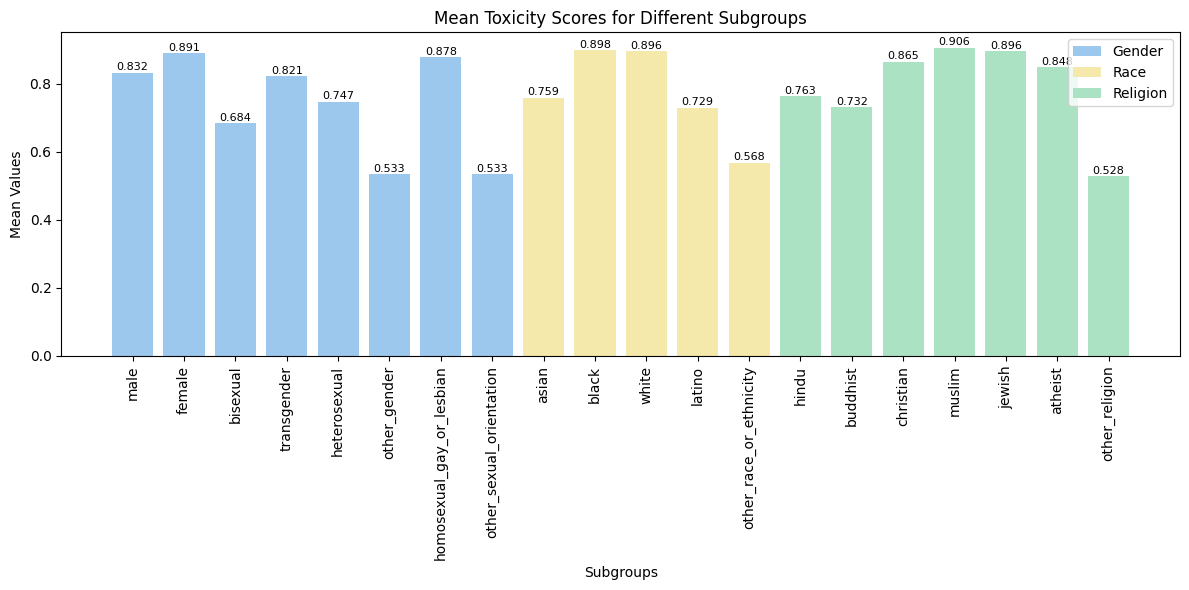

In [57]:
# plot

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(mean_gender.keys(), mean_gender.values(), label='Gender', color='#9CC8ED')
plt.bar(mean_race.keys(), mean_race.values(), label='Race', color='#F4E8AB')
plt.bar(mean_religion.keys(), mean_religion.values(), label='Religion', color='#AAE2C3')

plt.xlabel('Subgroups')
plt.ylabel('Mean Values')
plt.title('Mean Toxicity Scores for Different Subgroups')
plt.xticks(rotation=90)
plt.legend()

# Adding data labels to each bar
for data in [mean_gender, mean_race, mean_religion]:
    for subgroup, value in data.items():
        plt.text(subgroup, value + 0.001, round(value, 3), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# in ascending order

mean_gender_sorted = dict(sorted(mean_gender.items(), key=lambda item: item[1]))
mean_race_sorted = dict(sorted(mean_race.items(), key=lambda item: item[1]))
mean_religion_sorted = dict(sorted(mean_religion.items(), key=lambda item: item[1]))

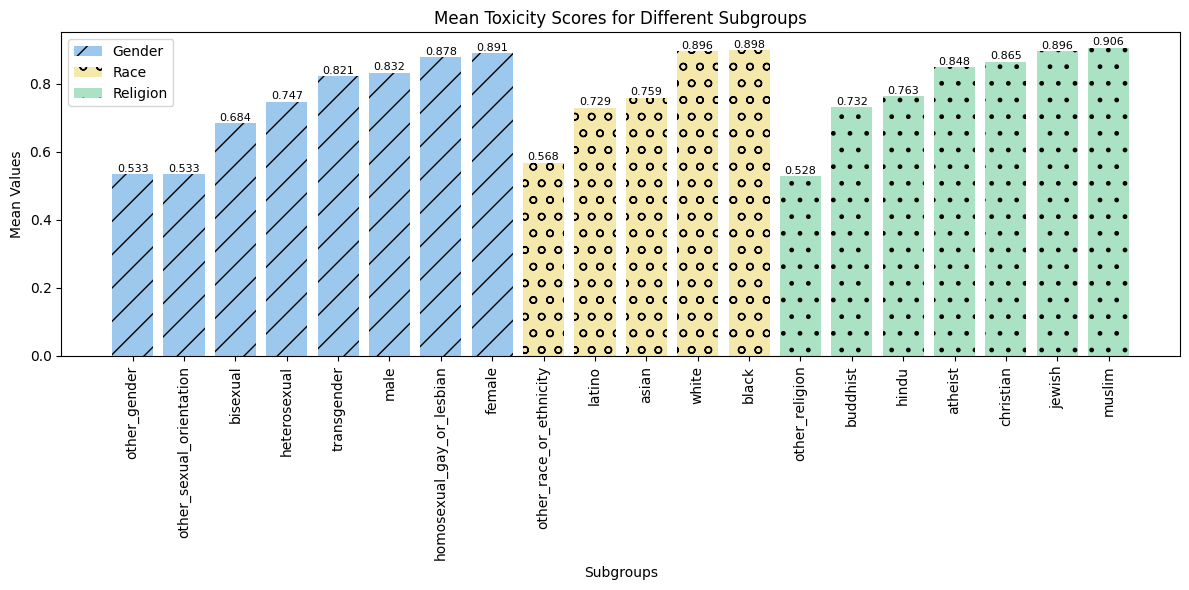

In [59]:
#plot

plt.figure(figsize=(12, 6))

plt.bar(mean_gender_sorted.keys(), mean_gender_sorted.values(), label='Gender', color='#9CC8ED',hatch='/')
plt.bar(mean_race_sorted.keys(), mean_race_sorted.values(), label='Race', color='#F4E8AB',hatch='o')
plt.bar(mean_religion_sorted.keys(), mean_religion_sorted.values(), label='Religion', color='#AAE2C3',hatch='.')


plt.xlabel('Subgroups')
plt.ylabel('Mean Values')
plt.title('Mean Toxicity Scores for Different Subgroups')
plt.xticks(rotation=90)
plt.legend()

# Adding data labels to each bar
for data in [mean_gender, mean_race, mean_religion]:
    for subgroup, value in data.items():
        plt.text(subgroup, value + 0.001, round(value, 3), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('mean_toxicity.png')

plt.show()

### aaa

In [ ]:
toxic_gender

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

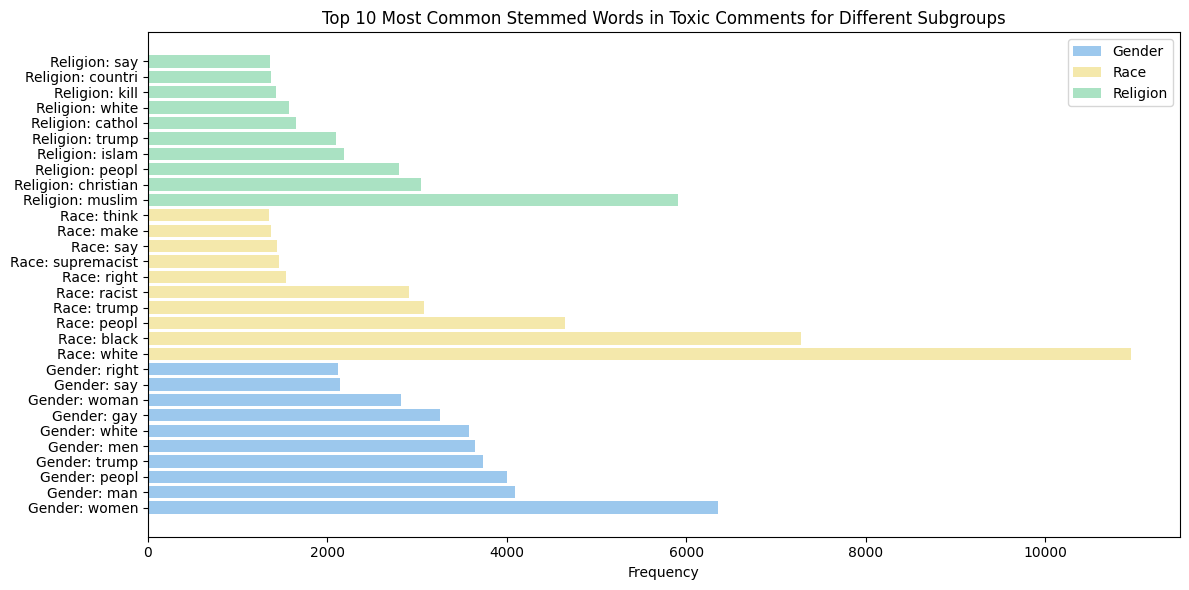

In [61]:
import string 


# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def most_common_words(data):
    stop_words = set(stopwords.words('english'))  

    all_words = ' '.join(data['comment_text']).lower()
    
    # patterns to remove
    additional_exclusions = ['’', '...', 's',"n't",'get','one','would']  
    
    # remove punctuations
    pattern = re.compile(r'[^\w\s]')
    
    words = word_tokenize(all_words)
    # Remove stopwords, punctuation, and apply stemming
    filtered_words = [
        stemmer.stem(word)
        for word in words
        if word not in stop_words
        and word not in string.punctuation
        and word not in additional_exclusions
        and word not in ['like']  # Exclude specific word 'like'
        and not pattern.match(word)
    ]
    words_count = Counter(filtered_words)
    return words_count.most_common(10)  # Get the 10 most common words

# Get the most common stemmed words for each subgroup
most_common_gender = most_common_words(toxic_gender)
most_common_race = most_common_words(toxic_race)
most_common_religion = most_common_words(toxic_religion)

# Prepare data for plotting
common_words = {
    'Gender': most_common_gender,
    'Race': most_common_race,
    'Religion': most_common_religion
}

# Plotting
plt.figure(figsize=(12, 6))
colors = {'Gender': '#9CC8ED', 'Race': '#F4E8AB', 'Religion': '#AAE2C3'}

for subgroup, common_words in common_words.items():
    words, counts = zip(*common_words)
    plt.barh([f'{subgroup}: {word}' for word in words], counts, label=subgroup,color=colors[subgroup])

plt.xlabel('Frequency')
plt.title('Top 10 Most Common Stemmed Words in Toxic Comments for Different Subgroups')
plt.legend()
plt.tight_layout()
plt.savefig('most_common.png')
plt.show()


Note: words like People, Trump, White, Right are used in all three subcategories

### Correlation heatmap using toxic = 1 and columns>= 0.5

In [40]:
# all values where toxic = 1 and cols >= 0.5

t_gend = (toxic_data[gender_cols].values >= 0.5).any(axis=1)
corr_gender = toxic_data.loc[t_gend, gender_cols + ['toxicity']]

t_race = (toxic_data[race_cols].values >= 0.5).any(axis=1)
corr_race = toxic_data.loc[t_race, race_cols + ['toxicity']]

t_rel = (toxic_data[religion_cols].values >= 0.5).any(axis=1)
corr_rel = toxic_data.loc[t_rel, religion_cols + ['toxicity']]

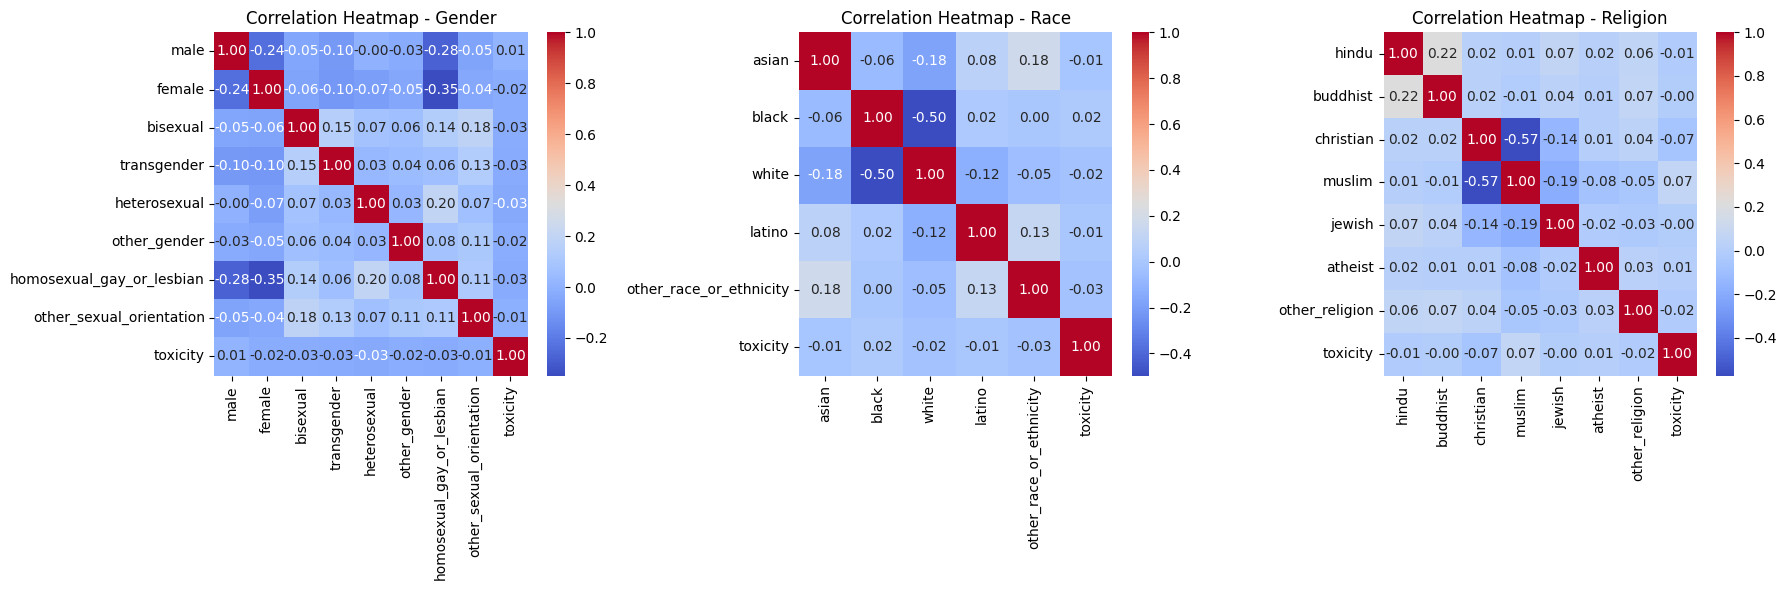

In [56]:

# Calculate correlations
corr_gender_matrix = corr_gender.corr()
corr_race_matrix = corr_race.corr()
corr_rel_matrix = corr_rel.corr()

# Create subplots for each heatmap
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot correlation heatmaps
sns.heatmap(corr_gender_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Correlation Heatmap - Gender')

sns.heatmap(corr_race_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Correlation Heatmap - Race')

sns.heatmap(corr_rel_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Correlation Heatmap - Religion')

plt.tight_layout()
plt.savefig('correlation_heatmap_sub.png')

plt.show()




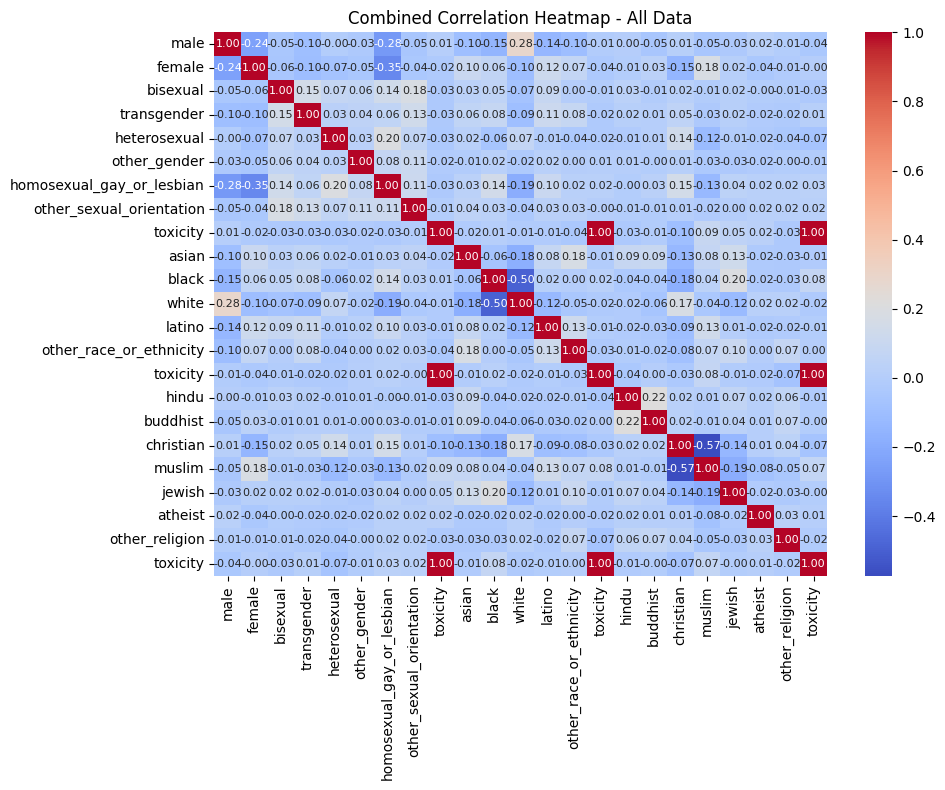

In [55]:
all_data = pd.concat([corr_gender, corr_race, corr_rel], axis=1)

# Calculate overall correlation matrix
corr_all_data = all_data.corr()

# Plot combined correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_all_data, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Combined Correlation Heatmap - All Data')

plt.tight_layout()

# Save the plot
plt.savefig('correlation_heatmap_all_data.png')

plt.show()
